In [1]:
# Add parent directory to path for imports
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))

In [2]:
from agricultural_csp.instance import *
from agricultural_csp.evaluator import *
from agricultural_csp.solver.agcsp_ts import *

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [3]:
from agricultural_csp.tools import display_grid_and_path

In [4]:
# Create a 50 x 50 square grid with five small square obstacles scattered on the grid
obstacle_half_size = 2  # Half-size of each small square obstacle

r_grid, c_grid = np.mgrid[0:50, 0:50]
grid_nodes = np.argwhere((r_grid >= 0) & (r_grid < 50) & (c_grid >= 0) & (c_grid < 50))

# Create five small square obstacles at different positions on the grid
obstacle_positions = [
    (10, 10),  # Top-left area
    (10, 40),  # Top-right area
    (25, 25),  # Center
    (40, 10),  # Bottom-left area
    (40, 40)   # Bottom-right area
]

obstacle_list = []
for obs_r, obs_c in obstacle_positions:
    obstacle = np.argwhere(
        (np.abs(r_grid - obs_r) <= obstacle_half_size) & 
        (np.abs(c_grid - obs_c) <= obstacle_half_size)
    )
    obstacle_list.append(obstacle)

obstacle_nodes = np.vstack(obstacle_list)
instance = AgcspInstance(grid_nodes, obstacle_nodes, 5, 90)

""" instance = AgcspInstance(grid_nodes, np.array([]), 5, 90) """
evaluator = AgcspEvaluator(instance)


Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (1501 nós)


Coverage: 0/2375 nodes (0.0%)
Obstacles: 0/125 covered


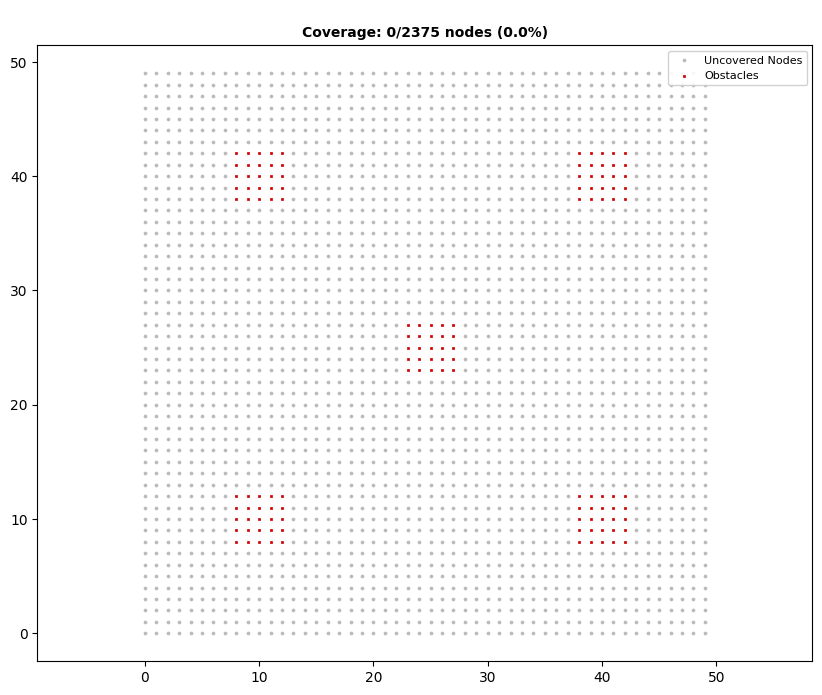

In [5]:
display_grid_and_path(inst=instance, evaluator=evaluator, path=[])

In [6]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.FSM_COVERAGE_PLANNER,
    phased_optimization=None,
    tabu_radius=3,
    search_strategy='best'
)

term_criteria = TerminationCriteria(max_iterations=300)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

  Visitou (np.int64(0), np.int64(0)), cobriu 7 novos nós. 2107 restantes.
Heurística 'Set Cover': Iniciando. 2107 alvos restantes.
  Visitou (np.int64(2), np.int64(2)), cobriu 14 novos nós. 2093 restantes.
  Visitou (np.int64(5), np.int64(2)), cobriu 15 novos nós. 2078 restantes.
  Visitou (np.int64(8), np.int64(2)), cobriu 15 novos nós. 2063 restantes.
  Visitou (np.int64(11), np.int64(2)), cobriu 15 novos nós. 2048 restantes.
  Visitou (np.int64(14), np.int64(2)), cobriu 15 novos nós. 2033 restantes.
  Visitou (np.int64(17), np.int64(2)), cobriu 15 novos nós. 2018 restantes.
  Visitou (np.int64(20), np.int64(2)), cobriu 15 novos nós. 2003 restantes.
  Visitou (np.int64(23), np.int64(2)), cobriu 15 novos nós. 1988 restantes.
  Visitou (np.int64(26), np.int64(2)), cobriu 15 novos nós. 1973 restantes.
  Visitou (np.int64(29), np.int64(2)), cobriu 15 novos nós. 1958 restantes.
  Visitou (np.int64(32), np.int64(2)), cobriu 15 novos nós. 1943 restantes.
  Visitou (np.int64(35), np.int64(2)

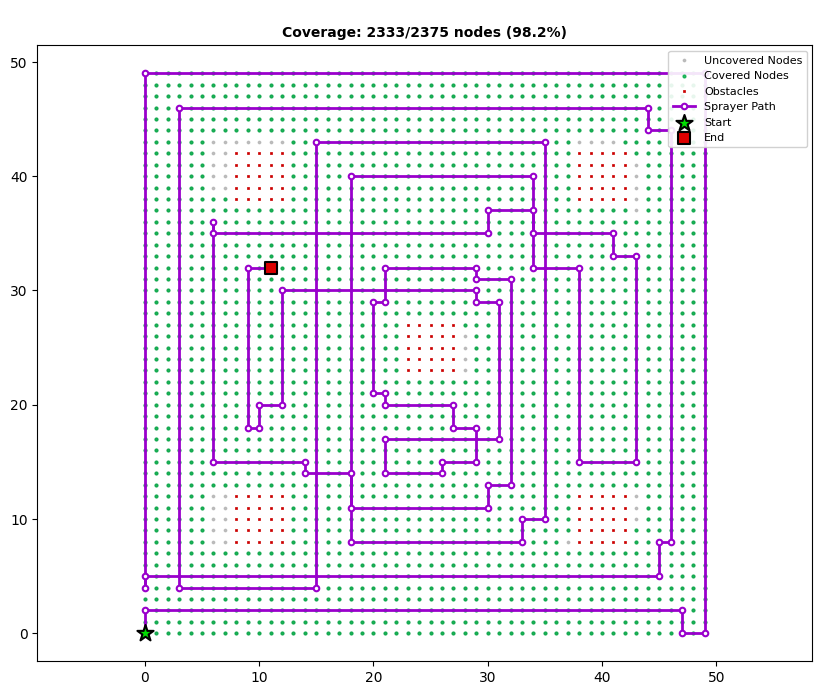

In [7]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [8]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 1800.00
-----------------------------------------------------------
Iteration 0: Best ObjFun = 1800.00, Current ObjFun = 1800.00
** BEST IMPROVING MOVE ENCONTRADO ** Tipo: move, Delta: -8.5587
Applying move: move with args (40, array([38, 32]))
Iteration 1: Best ObjFun = 1791.44, Current ObjFun = 1791.44
** BEST IMPROVING MOVE ENCONTRADO ** Tipo: move, Delta: -8.1325
Applying move: move with args (24, array([14, 14]))
Iteration 2: Best ObjFun = 1783.31, Current ObjFun = 1783.31
** BEST IMPROVING MOVE ENCONTRADO ** Tipo: remove, Delta: -5.7806
Applying move: remove with args (69,)
Iteration 3: Best ObjFun = 1777.53, Current ObjFun = 1777.53
** BEST IMPROVING MOVE ENCONTRADO ** Tipo: remove, Delta: -5.6109
Applying move: remove with args (22,)
Iteration 4: Best ObjFun = 1771.92, Current ObjFun = 1771.92
** BEST IMPROVING MOVE ENCONTRADO ** Tipo: move, 

Coverage: 2339/2375 nodes (98.5%)
Obstacles: 0/125 covered


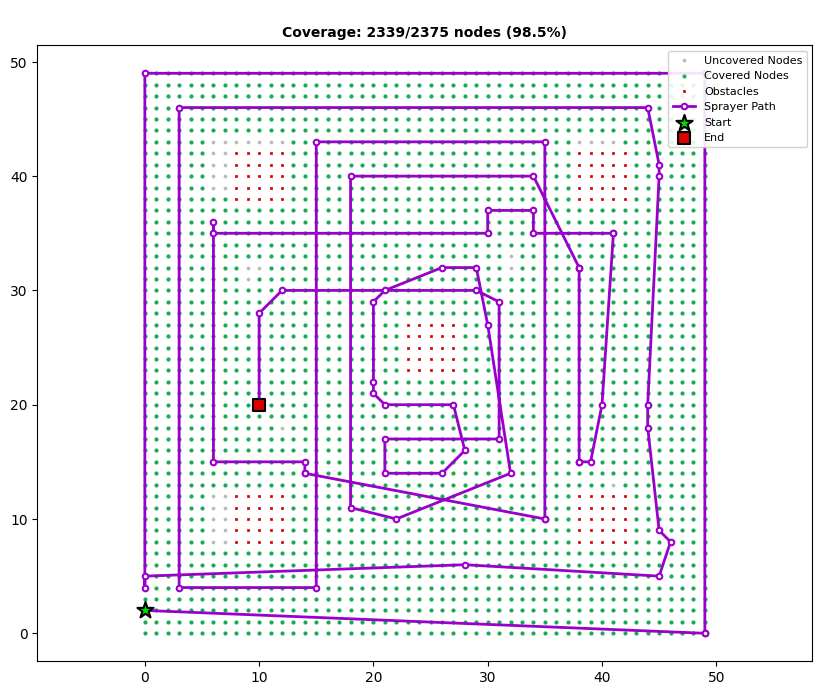

In [9]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)

In [10]:
solution.cache["hits_obstacle"]

np.False_

In [11]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.FSM_COVERAGE_PLANNER,
    phased_optimization=None,
    tabu_radius=3,
    search_strategy='first'
)

term_criteria = TerminationCriteria(max_iterations=300)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

  Visitou (np.int64(0), np.int64(0)), cobriu 7 novos nós. 2107 restantes.
Heurística 'Set Cover': Iniciando. 2107 alvos restantes.
  Visitou (np.int64(2), np.int64(2)), cobriu 14 novos nós. 2093 restantes.
  Visitou (np.int64(5), np.int64(2)), cobriu 15 novos nós. 2078 restantes.
  Visitou (np.int64(8), np.int64(2)), cobriu 15 novos nós. 2063 restantes.
  Visitou (np.int64(11), np.int64(2)), cobriu 15 novos nós. 2048 restantes.
  Visitou (np.int64(14), np.int64(2)), cobriu 15 novos nós. 2033 restantes.
  Visitou (np.int64(17), np.int64(2)), cobriu 15 novos nós. 2018 restantes.
  Visitou (np.int64(20), np.int64(2)), cobriu 15 novos nós. 2003 restantes.
  Visitou (np.int64(23), np.int64(2)), cobriu 15 novos nós. 1988 restantes.
  Visitou (np.int64(26), np.int64(2)), cobriu 15 novos nós. 1973 restantes.
  Visitou (np.int64(29), np.int64(2)), cobriu 15 novos nós. 1958 restantes.
  Visitou (np.int64(32), np.int64(2)), cobriu 15 novos nós. 1943 restantes.
  Visitou (np.int64(35), np.int64(2)

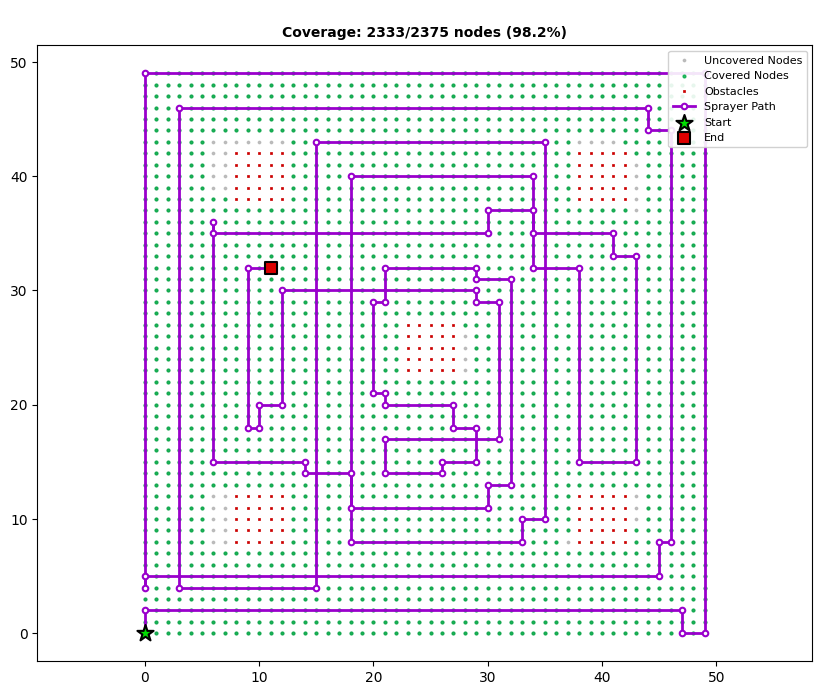

In [12]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [13]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 1800.00
-----------------------------------------------------------
Iteration 0: Best ObjFun = 1800.00, Current ObjFun = 1800.00
Applying move: remove with args (69,)
Iteration 1: Best ObjFun = 1794.22, Current ObjFun = 1794.22
Applying move: remove with args (35,)
Iteration 2: Best ObjFun = 1789.46, Current ObjFun = 1789.46
Applying move: remove with args (25,)
Iteration 3: Best ObjFun = 1785.50, Current ObjFun = 1785.50
Applying move: remove with args (43,)
Iteration 4: Best ObjFun = 1780.74, Current ObjFun = 1780.74
Applying move: remove with args (0,)
Iteration 5: Best ObjFun = 1775.74, Current ObjFun = 1775.74
Applying move: remove with args (50,)
Iteration 6: Best ObjFun = 1772.15, Current ObjFun = 1772.15
Applying move: remove with args (23,)
Iteration 7: Best ObjFun = 1767.25, Current ObjFun = 1767.25
Applying move: remove with args (54,)
Ite

Coverage: 2333/2375 nodes (98.2%)
Obstacles: 0/125 covered


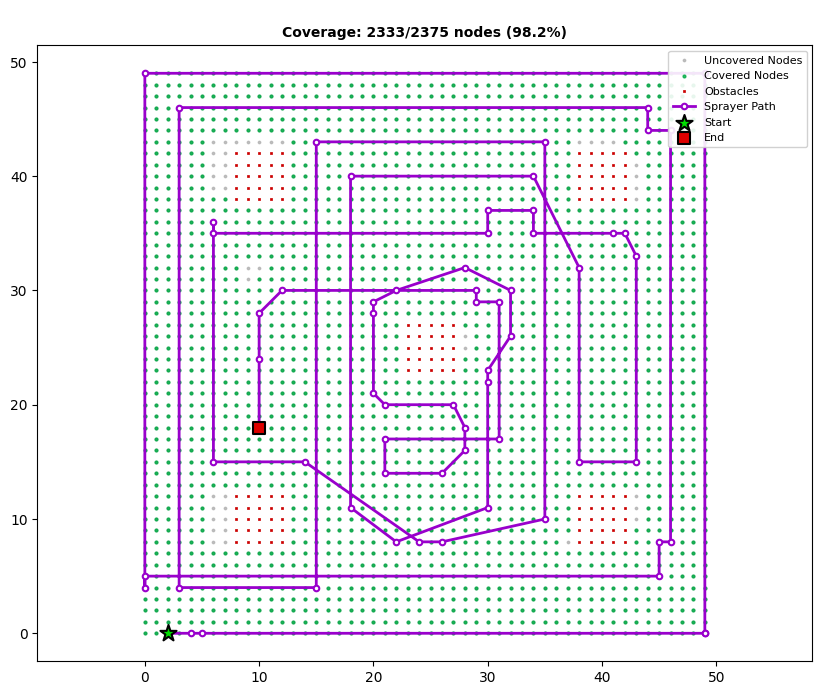

In [14]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)